# Kaggle - Digit Recognizer

This Python Notebook is to train the dataset to recognize the digits from 0-9 
and predict with validation tests

**Author: Han-Elliot Nguyen<br>Email: hanelliotn@gmail.com**

*Start Date: June 22, 2023<br>End Date: June 28, 2023*


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Open train data
train_data = pd.read_csv("./datasets/train.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Open test data
test_data = pd.read_csv("./datasets/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Get size of tran and test data
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [5]:
# Reshape test data
test_data = test_data / 255.0
test_data = test_data.values.reshape(-1,28,28,1)

In [6]:
# Drop label column
X = train_data.drop('label', axis=1)
y = train_data['label']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape and normalize the input data
X_train = X_train.values.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1) / 255.0

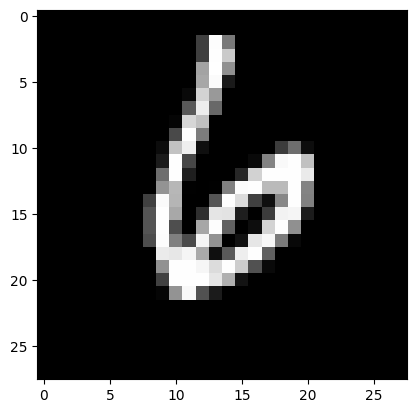

In [7]:
# Display first train image
def show_data(data_sample):
    plt.imshow(data_sample[0].reshape(28, 28), cmap='gray')

img = X_train.reshape(-1, 28, 28, 1)
show_data(img)

In [8]:
# Convert train vectors and values to binary matrix
y_train = to_categorical(y_train, num_classes=10)

In [9]:
# Create model using CNN with 3 hidden layers
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])

In [10]:
# Compile training model with Adam optimizer and cross-entropy loss
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
# Fit the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.4804 - accuracy: 0.8440
Epoch 2/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1624 - accuracy: 0.9531
Epoch 3/10
1050/1050 [==============================] - 12s 12ms/step - loss: 0.1299 - accuracy: 0.9628
Epoch 4/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1053 - accuracy: 0.9692
Epoch 5/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0976 - accuracy: 0.9722
Epoch 6/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0907 - accuracy: 0.9745
Epoch 7/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0834 - accuracy: 0.9760
Epoch 8/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0781 - accuracy: 0.9774
Epoch 9/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0698 - accuracy: 0.9796
Epoch 10/10
1050/1050 [==============================] - 13s 12m

In [12]:
# Predict model
y_pred = model.predict(test_data)

875/875 [==============================] - 4s 4ms/step


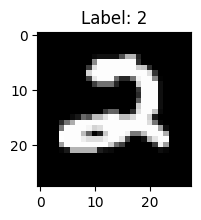

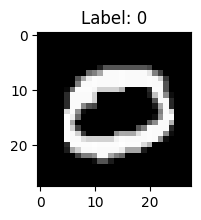

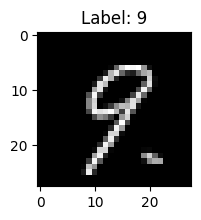

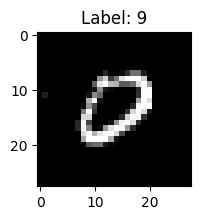

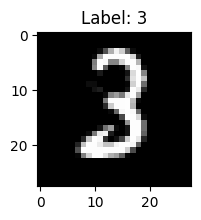

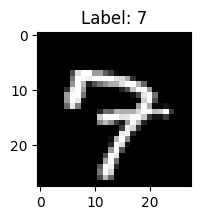

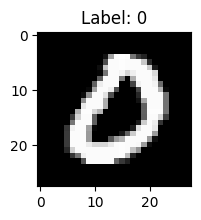

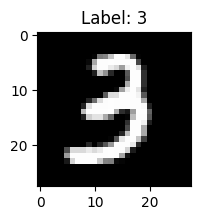

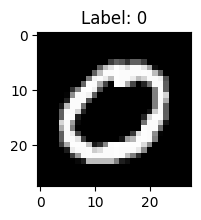

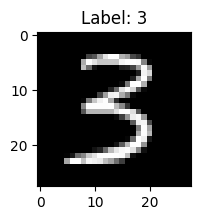

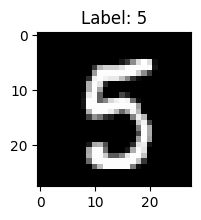

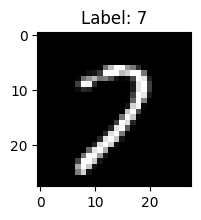

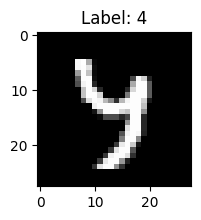

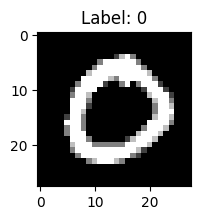

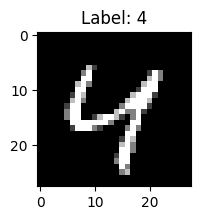

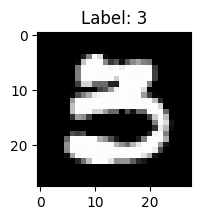

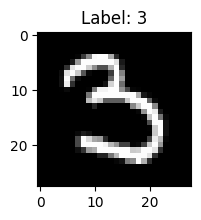

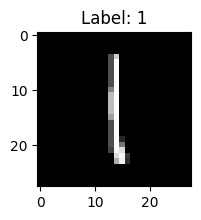

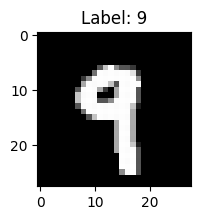

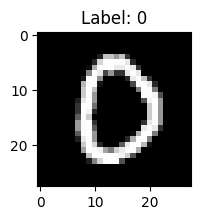

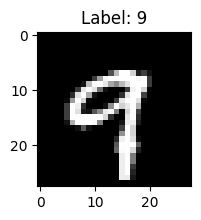

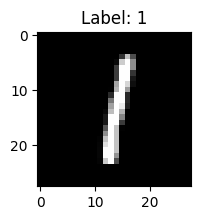

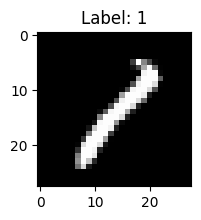

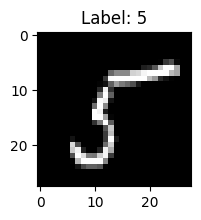

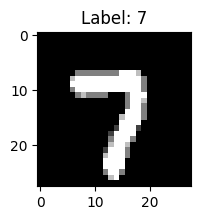

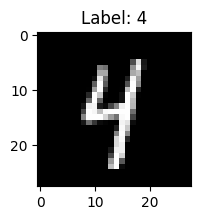

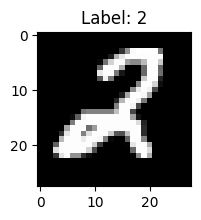

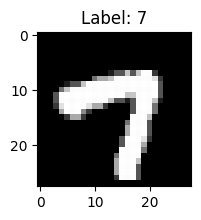

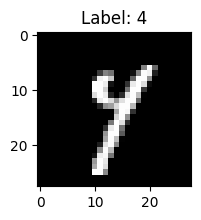

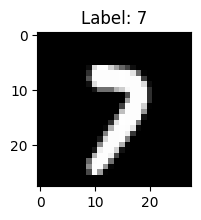

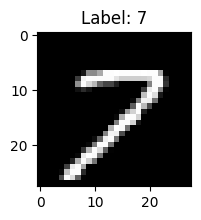

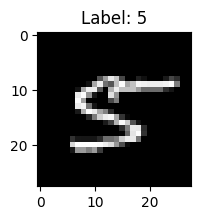

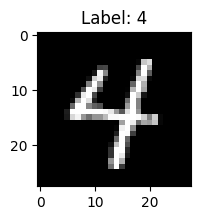

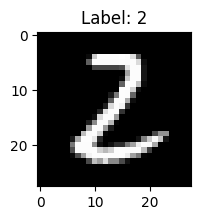

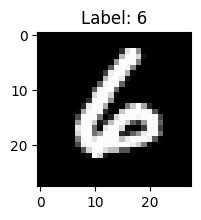

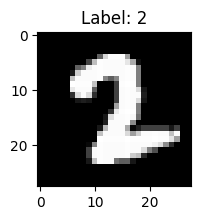

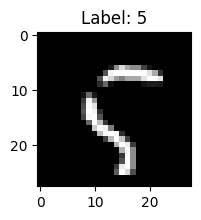

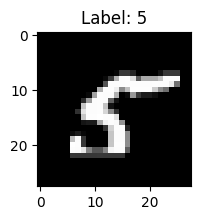

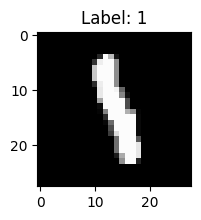

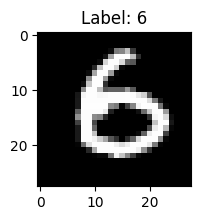

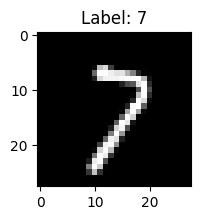

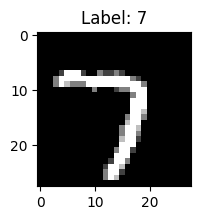

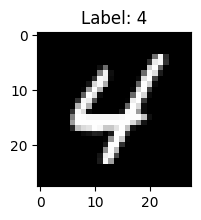

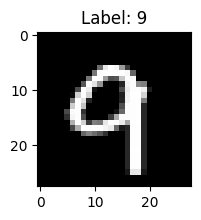

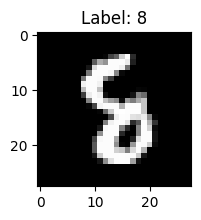

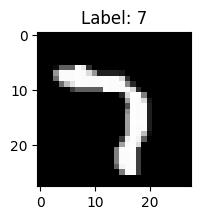

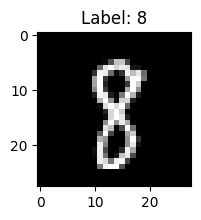

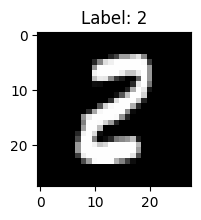

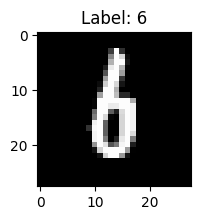

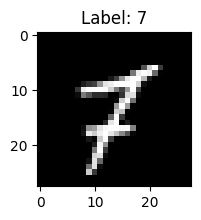

In [13]:
# Make predictions
y_pred = np.argmax(y_pred, axis=1)

for i in range(50):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_pred[i]}')
    plt.show()

In [14]:
# Create submission output
predictions = pd.DataFrame({'ImageId': range(1, len(y_pred) + 1), 'Label': y_pred})
predictions.to_csv('datasets/submission.csv', index=False)